Mingxin Liu

mxl592

For the first assignment, I'm going to implement a linear filter without any preset functions. A linear filter could achieve a few objectives, such as adding soft blur, sharpening details and removing noise and so on. For the purpose of this assignment, I will be implementing a method to blur the image. 

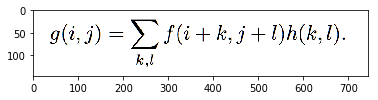

In [14]:
import cv2
img = cv2.imread('fnc1.png')
from matplotlib import pyplot as plt
plt.imshow(img)


Here is the function we calculate the weighted sum of inpit pixel values. The h(k,l) is the filter coefficients, or kernel. Here I set the kernel size as 3x3 matix as that of from the book. Dividing 25, I have a kernel 3x3 filled with 0.4.

In [6]:
import numpy as np
kernel = np.ones((3,3),np.float32)/30
print kernel
np.shape(kernel)


[[0.03333334 0.03333334 0.03333334]
 [0.03333334 0.03333334 0.03333334]
 [0.03333334 0.03333334 0.03333334]]


(3, 3)

In [11]:
import cv2
import numpy as np
import scipy.misc
from matplotlib import pyplot as plt
from pylab import*

img = cv2.imread('naturo-monkey-selfie.jpg')

kernel = np.ones((3,3),np.float32)/25
f = scipy.misc.imread('naturo-monkey-selfie.jpg') #f is the matix form of the original image I used for this project

#print f #here is the output of the image in numpy arrary
len(f)
np.shape(f)


/home/bruce/.virtualenvs/facecourse-py2/lib/python2.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  # Remove the CWD from sys.path while we load stuff.


(465, 620, 3)

output matrix
[[0. 1. 1. 1.]
 [1. 1. 1. 1.]]
output matrix
[[0.  0.1 1.  1. ]
 [1.  1.  1.  1. ]]
output matrix
[[0.  0.1 0.2 1. ]
 [1.  1.  1.  1. ]]
output matrix
[[0.  0.1 0.2 0.3]
 [1.  1.  1.  1. ]]
output matrix
[[0.  0.1 0.2 0.3]
 [0.6 1.  1.  1. ]]
output matrix
[[0.  0.1 0.2 0.3]
 [0.6 0.7 1.  1. ]]
output matrix
[[0.  0.1 0.2 0.3]
 [0.6 0.7 0.8 1. ]]
output matrix
[[0.  0.1 0.2 0.3]
 [0.6 0.7 0.8 0.9]]


/home/bruce/.virtualenvs/facecourse-py2/local/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


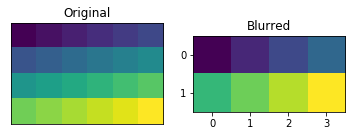

In [25]:
import cv2
import numpy as np
from pylab import*
from matplotlib import pyplot as plt

matrix = np.arange(24).reshape(4,6)
kernel = np.array([0.1, 0.1, 0.1, 0.1, 0.2,0.1,0.1,0.1,0.1]).reshape(3,3)

def applyFilter(kernel, matrix):
    (row, col ) = np.shape(matrix)
    (x,y) = np.shape(kernel)
    new_row = row - x + 1
    new_col = col - y + 1
    res = np.ones((new_row, new_col))
    for i in range(0, new_row):
        for j in range(0, new_col):
            sub_matrix = matrix[i:i+x, j:j+y]
            res[i ,j] = filter(sub_matrix, kernel, x, y)
            print "output matrix"
            print res
            plt.subplot(122),plt.imshow(res),plt.title('Blurred')
plt.xticks([]), plt.yticks([])

def filter(sub_matrix, kernel, x, y):
    sum = 0
    for i in range(0, x):
        for j in range(0, y):
            sum +=sub_matrix[i, j] * kernel[i, j]
            return sum
applyFilter(kernel, matrix)

plt.subplot(121),plt.imshow(matrix),plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.show()



It's not very clear how the image is blurred, but the concept here is very simple. I timed the original matrix with a 3x3 kernel and output with a 4x4 matix that contains all four colours from the original matrix to one. Here is a result of the blurred image.

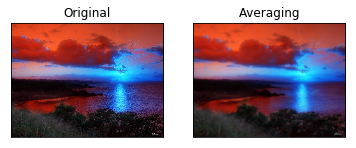